In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Complete attribute documentation:
1 id: patient identification number
2 ccf: social security number (I replaced this with a dummy value of 0)
3 age: age in years
4 sex: sex (1 = male; 0 = female)
5 painloc: chest pain location (1 = substernal; 0 = otherwise)
6 painexer (1 = provoked by exertion; 0 = otherwise)
7 relrest (1 = relieved after rest; 0 = otherwise)
8 pncaden (sum of 5, 6, and 7)
9 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
11 htn
12 chol: serum cholestoral in mg/dl
13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
14 cigs (cigarettes per day)
15 years (number of years as a smoker)
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
17 dm (1 = history of diabetes; 0 = no such history)
18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
19 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
20 ekgmo (month of exercise ECG reading)
21 ekgday(day of exercise ECG reading)
22 ekgyr (year of exercise ECG reading)
23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
28 proto: exercise protocol

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
df = pd.read_csv(r'heart.csv')

In [4]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
cps = pd.get_dummies(df['cp']).rename(columns = {0:'cp_1',1:'cp_2',2:'cp_3',3:'cp_4'})

In [7]:
df = pd.concat([df,cps],axis=1)
df.drop('cp',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [8]:
thals = pd.get_dummies(df['thal']).rename(columns = {0:'thal_0',1:'thal_1',2:'thal_2',3:'thal_3'})

In [9]:
df = pd.concat([df,thals],axis=1)
df.drop('thal',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


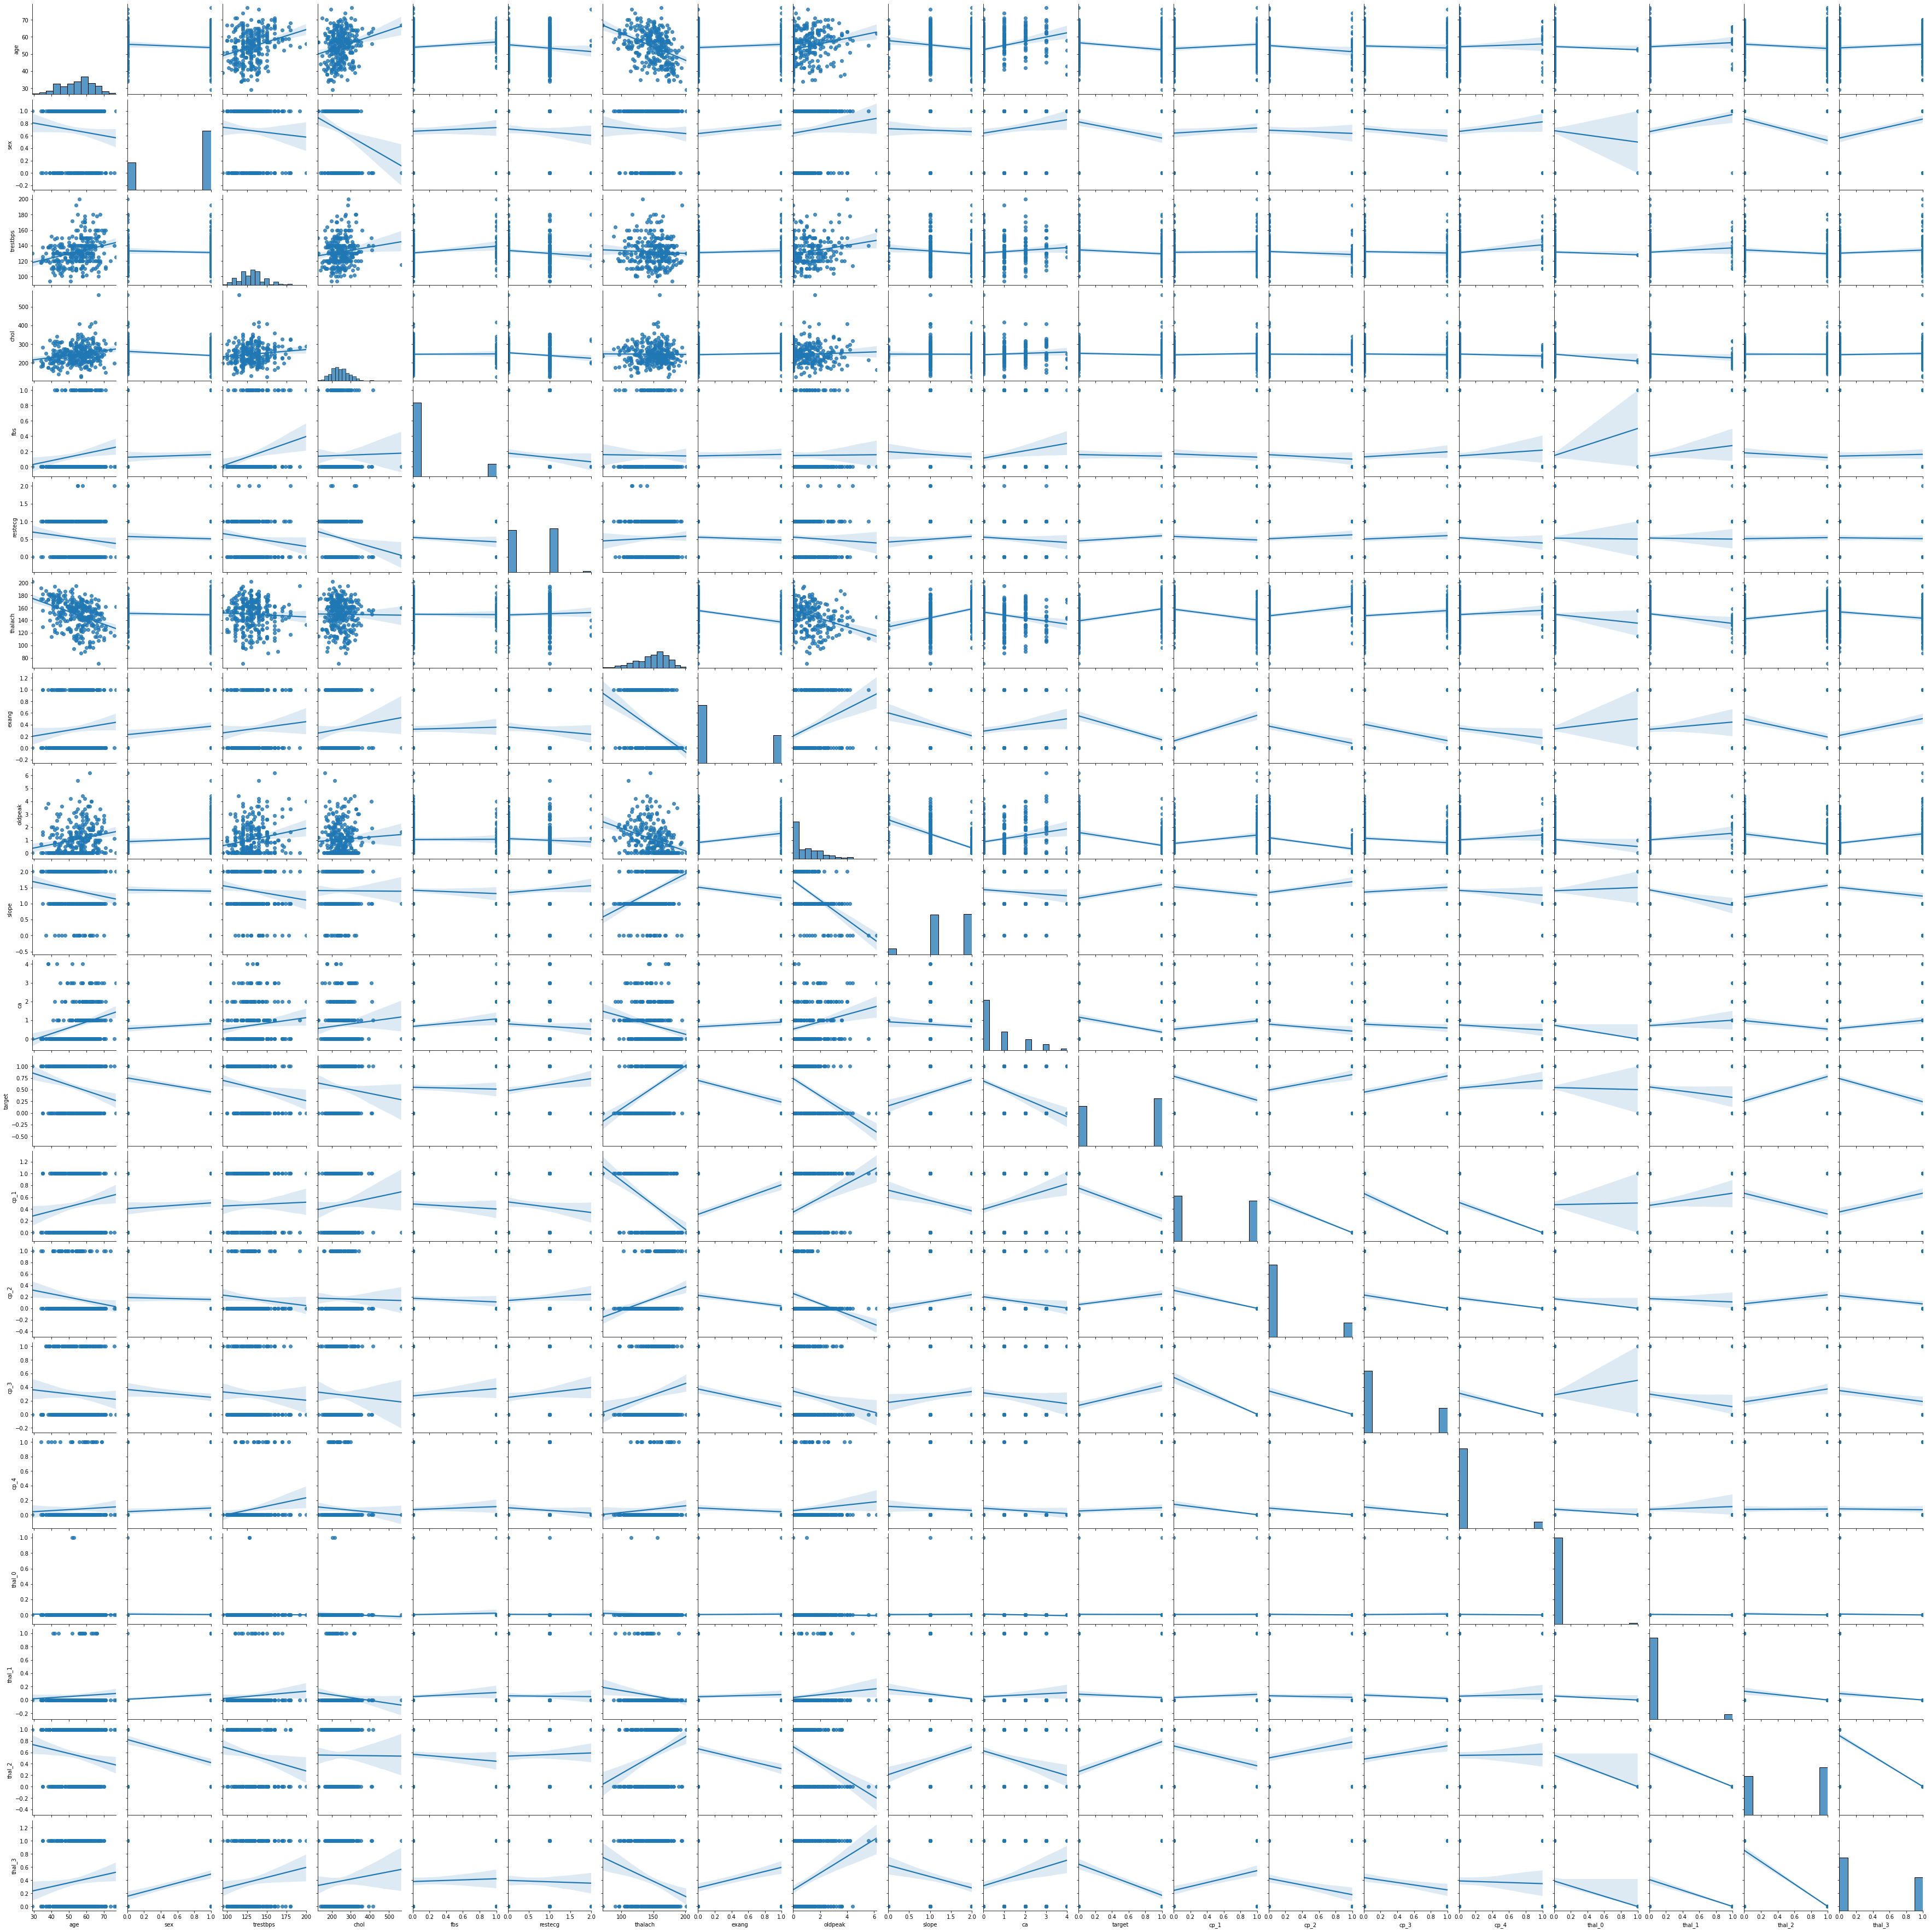

In [10]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

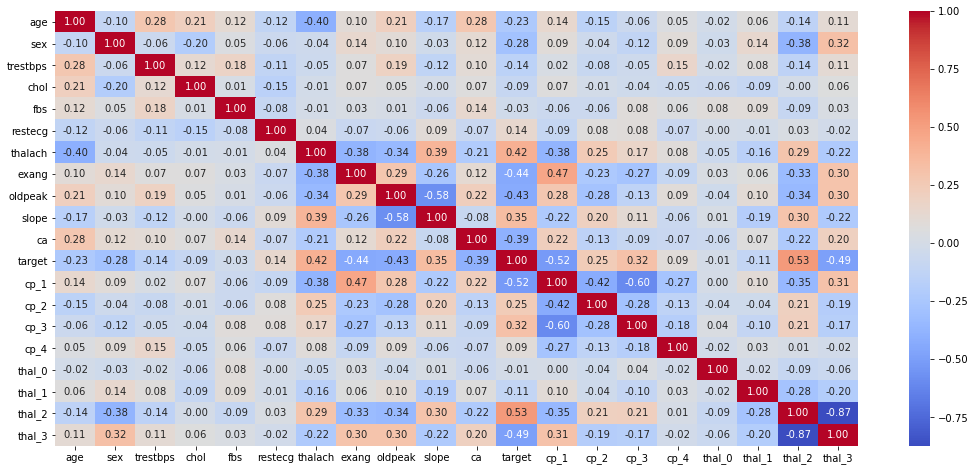

In [11]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),fmt='.2f',cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

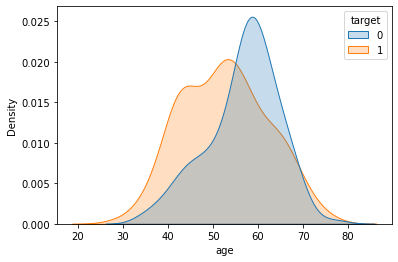

In [12]:
sns.kdeplot(data=df,x='age',hue='target',shade=True)

<AxesSubplot:xlabel='sex', ylabel='Density'>

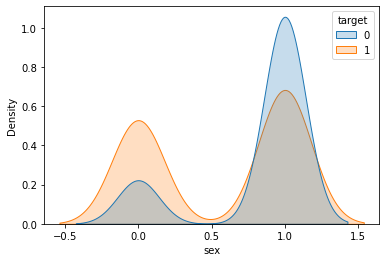

In [13]:
sns.kdeplot(data=df,x='sex',hue='target',shade=True)

In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

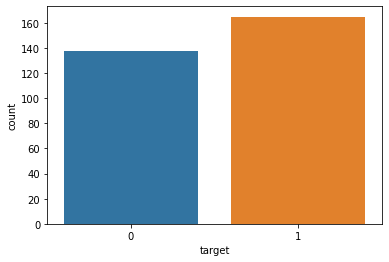

In [15]:
sns.countplot(x='target',data=df)

In [16]:
df.nunique()

age          41
sex           2
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
target        2
cp_1          2
cp_2          2
cp_3          2
cp_4          2
thal_0        2
thal_1        2
thal_2        2
thal_3        2
dtype: int64

In [17]:
x = df.drop('target',axis=1)
y = df['target']

In [18]:
x.describe(include='all')

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
x_sc = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [20]:
x_sc.describe(include='all')

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,1.202192e-15,-3.297692e-16,3.341661e-16,1.183505e-16,-1.218314e-17,-1.282436e-17,6.020120e-16,4.125779e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
25%,-7.572802e-01,-1.468418e+00,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,-1.100763e+00,-7.931155e-01
50%,6.988599e-02,6.810052e-01,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-9.453835e-01,-4.445542e-01,-6.346478e-01,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,-7.931155e-01
75%,7.316189e-01,6.810052e-01,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.057772e+00,-4.445542e-01,1.575677e+00,-2.866058e-01,-8.151391e-02,-2.513123e-01,9.084609e-01,1.260850e+00
max,2.496240e+00,6.810052e-01,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.057772e+00,2.249444e+00,1.575677e+00,3.489114e+00,1.226784e+01,3.979112e+00,9.084609e-01,1.260850e+00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  target    303 non-null    int64  
 12  cp_1      303 non-null    uint8  
 13  cp_2      303 non-null    uint8  
 14  cp_3      303 non-null    uint8  
 15  cp_4      303 non-null    uint8  
 16  thal_0    303 non-null    uint8  
 17  thal_1    303 non-null    uint8  
 18  thal_2    303 non-null    uint8  
 19  thal_3    303 non-null    uint8  
dtypes: float64(1), int64(11), uint8(

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x_sc, y, test_size=0.3, random_state=101)

In [23]:
model = KNeighborsClassifier().fit(xtrain,ytrain)

In [24]:
model.score(xtest,ytest)

0.7802197802197802

In [25]:
model.score(xtrain,ytrain)

0.8820754716981132

In [26]:
scores = []
for i in range(3,31):
    model_i = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores.append(model_i.score(xtest,ytest))

In [27]:
import numpy as np

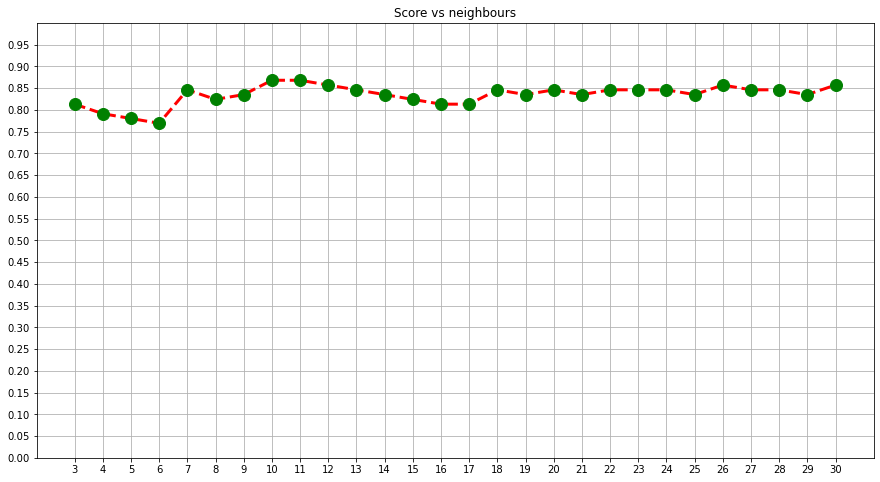

In [28]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores, color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.title('Score vs neighbours')
plt.grid()

In [29]:
model_knn = KNeighborsClassifier(n_neighbors=11).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [30]:
from sklearn.svm import SVC

In [31]:
model_svc = SVC().fit(xtrain,ytrain)
print(round(model_svc.score(xtest,ytest)*100,2),'%')

83.52 %


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(round(model_rf.score(xtest,ytest)*100,2),'%')

79.12 %


In [34]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=0.3, random_state=101)

In [35]:
model_rf1 = RandomForestClassifier().fit(xtrain1,ytrain1)
print(round(model_rf1.score(xtest1,ytest1)*100,2),'%')

79.12 %


In [36]:
from sklearn.ensemble import BaggingClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag.score(xtest,ytest)*100,2),'%')

78.02 %


In [39]:
model_bag2 = BaggingClassifier(SVC(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag2.score(xtest,ytest)*100,2),'%')

83.52 %


In [40]:
model_bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


!pip install xgboost

In [43]:
import xgboost as xgb

In [44]:
model_xgb = xgb.XGBClassifier().fit(xtrain,ytrain)

[00:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print(round(model_xgb.score(xtest,ytest)*100,2),'%')

80.22 %


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model_legit = LogisticRegression().fit(xtrain,ytrain)
print(round(model_legit.score(xtest,ytest)*100,2),'%')

84.62 %


In [49]:
pd.to_pickle(model_bag3,r'Heart.pkl')

In [50]:
m = pd.read_pickle(r'Heart.pkl')

In [51]:
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,0,0,0,0,0,1,0


In [52]:
age = eval(input('Enter Your Age:'))
sex = eval(input('Enter Your Sex:'))
trestbp = eval(input('Enter Trestbps:'))
chols = eval(input('Enter Chol:'))
fbs = eval(input('Enter FBS:'))
rest = eval(input('Enter RestECG:'))
thalachs = eval(input('Enter Thalachs:'))
exangs = eval(input('Enter Exang:'))
oldpeaks = eval(input('Enter OldPeak:'))
slops = eval(input('Enter Slope:'))
cas = eval(input('Enter Ca:'))
cp1 = eval(input('Enter CP1:'))
cp2 = eval(input('Enter CP2:'))
cp3 = eval(input('Enter CP3:'))
cp4 = eval(input('Enter CP4:'))
thal0 = cp1 = eval(input('Enter Thal0:'))
thal1 = cp1 = eval(input('Enter Thal1:'))
thal2 = cp1 = eval(input('Enter Thal2:'))
thal3 = cp1 = eval(input('Enter Thal3:'))


inp = pd.DataFrame({'Age':[age],'Sex':[sex],'TrestBP':[trestbp],'Chol':[chols],'FBS':[fbs],'RestECG':[rest],'Thalach':[thalachs],'Exang':[exangs],'OldPeak':[oldpeaks],'Slope':[slops],'Ca':[cas],'CP1':[cp1],'CP2':[cp2],'CP3':[cp3],'CP4':[cp4],'Thal0':[thal0],'Thal1':[thal1],'Thal2':[thal2],'Thal3':[thal3]})

Enter Your Age: 63
Enter Your Sex: 1
Enter Trestbps: 145
Enter Chol: 233
Enter FBS: 1
Enter RestECG: 0
Enter Thalachs: 150
Enter Exang: 0
Enter OldPeak: 2.3
Enter Slope: 0
Enter Ca: 0
Enter CP1: 0
Enter CP2: 0
Enter CP3: 0
Enter CP4: 1
Enter Thal0: 0
Enter Thal1: 1
Enter Thal2: 0
Enter Thal3: 0


In [53]:
inp

,Age,Sex,TrestBP,Chol,FBS,RestECG,Thalach,Exang,OldPeak,Slope,Ca,CP1,CP2,CP3,CP4,Thal0,Thal1,Thal2,Thal3
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,0,1,0,1,0,0


In [54]:
m.predict(inp)

array([0], dtype=int64)